In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea

from matplotlib.pylab import style
style.use("ggplot")

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # graph of autocorrelation & partial ~ 
from statsmodels.tsa.stattools import adfuller as ADF # stationary test
from statsmodels.stats.diagnostic import acorr_ljungbox # white noise test
import statsmodels.api as sm # D-W test
from statsmodels.graphics.api import qqplot
# import statsmodels.tsa.ARIMA as ARIMA

# Beijing

In [3]:
shanghai_data = pd.read_csv("../baidu/SH/day.csv")
shanghai_data

,Time,确诊,治愈,死亡,新增确诊,新增本土,新增无症状
0,2.14,3900,3714,7,6,0,0
1,2.15,3913,3725,7,13,0,0
2,2.16,3922,3744,7,9,0,1
3,2.17,3935,3760,7,13,0,0
4,2.18,3953,3771,7,18,0,3
...,...,...,...,...,...,...,...
85,5.10,61370,55575,567,229,228,1260
86,5.11,61514,56008,572,144,144,1306
87,5.12,61741,56424,574,227,227,1871
88,5.13,61936,57146,575,195,194,1487


In [4]:
beijing_data = pd.read_csv("../baidu/BJ/day.csv")
beijing_data

,Time,确诊,治愈,死亡,新增确诊,新增本土,新增无症状
0,2.14,1368,1320,9,1,0,2
1,2.15,1368,1327,9,0,0,1
2,2.16,1368,1334,9,0,0,2
3,2.17,1368,1336,9,0,0,1
4,2.18,1372,1338,9,4,0,1
...,...,...,...,...,...,...,...
85,5.10,2597,1983,9,25,24,14
86,5.11,2632,2028,9,35,35,11
87,5.12,2675,2121,9,43,42,9
88,5.13,2707,2160,9,32,32,25


In [5]:
train_data = beijing_data

## Added confirm

In [6]:
add_confirm_data = pd.DataFrame(train_data.loc[:,"新增确诊"]) 
add_confirm_data.tail()

,新增确诊
85,25
86,35
87,43
88,32
89,33


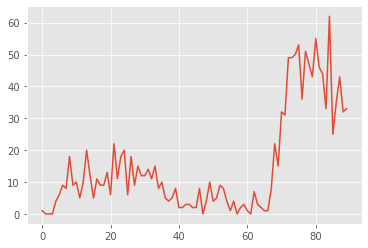

In [17]:
# plot
plt.plot(add_confirm_data)
plt.show()

(-1.7948807081178189, 0.38300622564169284, 7, 82, {'1%': -3.512738056978279, '5%': -2.8974898650628984, '10%': -2.585948732897085}, 523.1078941944987)


/home/zrh/Software/Environment/anaconda/envs/env0/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


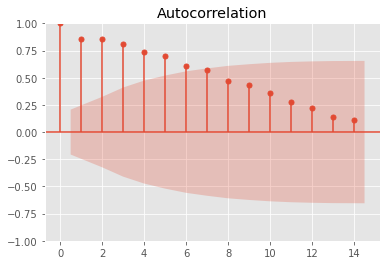

In [18]:
# plot acf
lags = 14
plot_acf(add_confirm_data, lags=lags).show()
# test stationary
print(sm.tsa.stattools.adfuller(add_confirm_data))

In [19]:
# test stationary: root test
print(ADF(add_confirm_data.新增确诊))

(-1.7948807081178189, 0.38300622564169284, 7, 82, {'1%': -3.512738056978279, '5%': -2.8974898650628984, '10%': -2.585948732897085}, 523.1078941944987)


/home/zrh/Software/Environment/anaconda/envs/env0/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26032 (\N{CJK UNIFIED IDEOGRAPH-65B0}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/zrh/Software/Environment/anaconda/envs/env0/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22686 (\N{CJK UNIFIED IDEOGRAPH-589E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/zrh/Software/Environment/anaconda/envs/env0/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30830 (\N{CJK UNIFIED IDEOGRAPH-786E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/zrh/Software/Environment/anaconda/envs/env0/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35786 (\N{CJK UNIFIED IDEOGRAPH-8BCA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


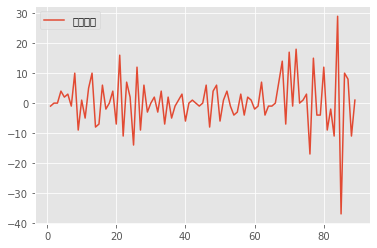

/home/zrh/Software/Environment/anaconda/envs/env0/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


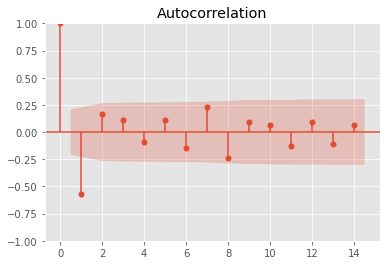

In [23]:
# first-order difference
d1 = 1
d1_add_confirm = add_confirm_data.diff(periods=d1, axis=0).dropna()

# sequence graph
d1_add_confirm.plot()
plt.show()

# autocorrelogram
plot_acf(d1_add_confirm, lags=14).show()

In [24]:
# stationary test
print("Stationary test: ", ADF(d1_add_confirm.新增确诊))

Stationary test:  (-4.065609893772978, 0.0011033578555468425, 3, 85, {'1%': -3.5097356063504983, '5%': -2.8961947486260944, '10%': -2.5852576124567475}, 515.3084108400425)


In [25]:
# white noise test
print("White noise test: ", acorr_ljungbox(d1_add_confirm, lags=1))

White noise test:       lb_stat     lb_pvalue
1  29.399434  5.889484e-08


/home/zrh/Software/Environment/anaconda/envs/env0/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/zrh/Software/Environment/anaconda/envs/env0/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,
/home/zrh/Software/Environment/anaconda/envs/env0/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  
/home/zrh/Software/Environment/anaconda/envs/env0/lib/python3.7/site-package

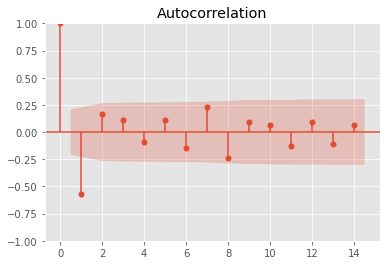

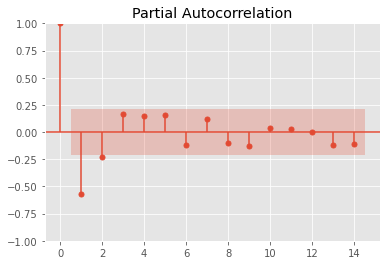

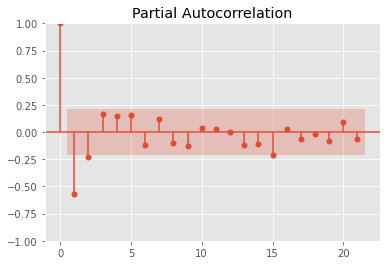

In [26]:
# order determination
# autocorrelogram
plot_acf(d1_add_confirm, lags=14).show()

# partical autocorrelogram
plot_pacf(d1_add_confirm, lags=14).show()
plot_pacf(d1_add_confirm, lags=21).show()


In [27]:
# BIC AIC optimization
pmax = qmax = len(d1_add_confirm)//10
pmax

8

In [28]:
# BIC
bic_matrix = []
for p in range(pmax+1):
    tmp = []
    for q in range(qmax+1):
        # try:
        tmp.append(sm.tsa.ARIMA(add_confirm_data, order=(p,1,q)).fit().bic)
        # except:
            # tmp.append(None)
    bic_matrix.append(tmp)
bic_matrix

/home/zrh/Software/Environment/anaconda/envs/env0/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/zrh/Software/Environment/anaconda/envs/env0/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/zrh/Software/Environment/anaconda/envs/env0/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/zrh/Software/Environment/anaconda/envs/env0/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/ho

[[635.8305005071237,
  611.9781100119621,
  602.6841200499531,
  606.6035932509878,
  611.0921702580627,
  614.795459935772,
  618.9430165837954,
  623.3269550712315,
  627.127937824166],
 [606.8555822187465,
  609.1160762038811,
  606.594169937402,
  610.2895950142492,
  614.7659949661861,
  618.7698534846579,
  623.2563331787804,
  627.7287170197512,
  630.1960477252201],
 [607.364036555503,
  610.111210329511,
  611.0824026827252,
  614.7553504012515,
  618.6394760272559,
  617.9564838661057,
  622.4025084430837,
  627.933646250019,
  628.6055057856657],
 [609.2318829034447,
  611.3825821394404,
  615.1814974437966,
  618.7141092077792,
  622.7145616772401,
  626.8252245500441,
  631.175251435506,
  629.0549973468744,
  632.1813847464852],
 [611.6628664142556,
  615.4334166483219,
  619.5896665532193,
  622.9944462374492,
  627.6683455764942,
  629.3665538343603,
  633.8519909403069,
  632.4896248996164,
  637.8840614533276],
 [614.4518389728933,
  616.3336354506599,
  616.603543163

In [29]:
bic_df = pd.DataFrame(bic_matrix)
bic_df

,0,1,2,3,4,5,6,7,8
0,635.830501,611.978110,602.684120,606.603593,611.092170,614.795460,618.943017,623.326955,627.127938
1,606.855582,609.116076,606.594170,610.289595,614.765995,618.769853,623.256333,627.728717,630.196048
2,607.364037,610.111210,611.082403,614.755350,618.639476,617.956484,622.402508,627.933646,628.605506
3,609.231883,611.382582,615.181497,618.714109,622.714562,626.825225,631.175251,629.054997,632.181385
4,611.662866,615.433417,619.589667,622.994446,627.668346,629.366554,633.851991,632.489625,637.884061
5,614.451839,616.333635,616.603543,622.212712,624.266999,630.711846,633.349272,636.956124,640.685478
6,617.476559,620.277657,624.166892,625.231733,631.948328,631.652718,636.776033,640.967887,641.978444
7,619.649217,623.779820,624.407323,630.935609,631.439557,636.850345,640.772528,644.906390,647.950976
8,623.181481,627.133992,627.352019,632.541148,636.574624,639.462651,644.116714,647.501490,651.077404


In [30]:
p,d = bic_df.stack().idxmin()
p,d

(0, 2)

In [31]:
# AIC
aic_matrix = []
for p in range(pmax+1):
    tmp = []
    for q in range(qmax+1):
        # try:
        tmp.append(sm.tsa.ARIMA(add_confirm_data, order=(p,1,q)).fit().bic)
        # except:
            # tmp.append(None)
    aic_matrix.append(tmp)
aic_matrix

/home/zrh/Software/Environment/anaconda/envs/env0/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/zrh/Software/Environment/anaconda/envs/env0/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/zrh/Software/Environment/anaconda/envs/env0/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/zrh/Software/Environment/anaconda/envs/env0/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/ho

[[635.8305005071237,
  611.9781100119621,
  602.6841200499531,
  606.6035932509878,
  611.0921702580627,
  614.795459935772,
  618.9430165837954,
  623.3269550712315,
  627.127937824166],
 [606.8555822187465,
  609.1160762038811,
  606.594169937402,
  610.2895950142492,
  614.7659949661861,
  618.7698534846579,
  623.2563331787804,
  627.7287170197512,
  630.1960477252201],
 [607.364036555503,
  610.111210329511,
  611.0824026827252,
  614.7553504012515,
  618.6394760272559,
  617.9564838661057,
  622.4025084430837,
  627.933646250019,
  628.6055057856657],
 [609.2318829034447,
  611.3825821394404,
  615.1814974437966,
  618.7141092077792,
  622.7145616772401,
  626.8252245500441,
  631.175251435506,
  629.0549973468744,
  632.1813847464852],
 [611.6628664142556,
  615.4334166483219,
  619.5896665532193,
  622.9944462374492,
  627.6683455764942,
  629.3665538343603,
  633.8519909403069,
  632.4896248996164,
  637.8840614533276],
 [614.4518389728933,
  616.3336354506599,
  616.603543163

In [32]:
p_aic, q_aic = pd.DataFrame(aic_matrix).stack().idxmin()
p_aic, q_aic

(0, 2)

In [33]:
# fit model
model = sm.tsa.ARIMA(add_confirm_data, order=(0,1,2)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   新增确诊   No. Observations:                   90
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -294.609
Date:                Tue, 17 May 2022   AIC                            595.218
Time:                        16:47:36   BIC                            602.684
Sample:                             0   HQIC                           598.228
                                 - 90                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7155      0.070    -10.239      0.000      -0.853      -0.579
ma.L2          0.4134      0.067      6.131      0.000       0.281       0.546
sigma2        43.5979      4.773      9.134      0.000      34.242      52.953
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                13.27
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               2.86   Skew:                             0.31
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/home/zrh/Software/Environment/anaconda/envs/env0/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """
/home/zrh/Software/Environment/anaconda/envs/env0/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,
/home/zrh/Software/Environment/anaconda/envs/env0/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


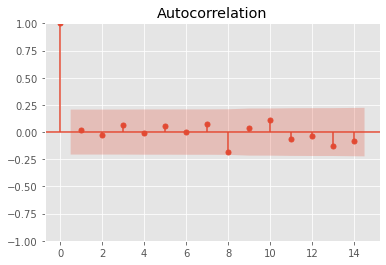

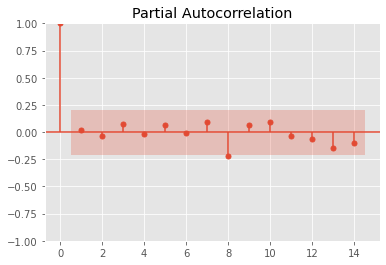

In [34]:
# error test

# autocorrelogram
resid = model.resid
plot_acf(resid, lags=14).show()
plot_pacf(resid, lags=14).show()
# plot_pacf(resid, loags=14).show()

/home/zrh/Software/Environment/anaconda/envs/env0/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


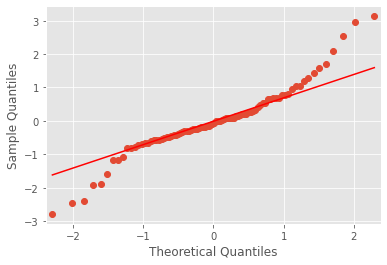

In [35]:
# use QQ graph to test whether it is a random series
qqplot(resid, line="q", fit=True).show()

In [36]:
# use DW test to test whether it is a random series
print("DW test result: ", sm.stats.durbin_watson(resid.values))

# other ways to test
print("Ljung-Box: ", acorr_ljungbox(resid, lags=1))

DW test result:  1.9525983125943847
Ljung-Box:      lb_stat  lb_pvalue
1  0.022605   0.880489


In [38]:
# predict
pre_n = 2
last_day = train_data.新增确诊.shape[0]
predict = pd.Series( model.forecast(pre_n), index=[last_day + i for i in range(pre_n)])
predict

90    34.631256
91    33.300798
Name: predicted_mean, dtype: float64

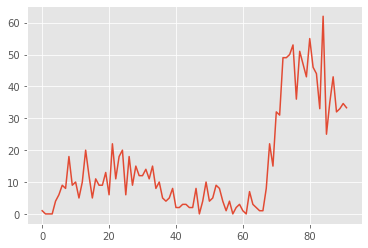

In [39]:
data = pd.concat((train_data.新增确诊, predict), axis=0)
plt.plot(pd.DataFrame(data) )
plt.show()